# Sample K-means problem


In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:

group1 = np.array([[1, 2], [2, 3], [1.5, 1], [2.5, 2.5], [0.5, 1.8],
                   [1.8, 2.2], [2, 1.5], [1.2, 2.8], [0.8, 2], [1.7, 1.3]])
group2 = np.array([[6, 8], [7, 9], [6.5, 7], [7.5, 8.5], [5.5, 7.8],
                   [6.8, 8.2], [7, 7.5], [6.2, 8.8], [5.8, 8], [6.7, 7.3]])
group3 = np.array([[11, 4], [12, 5], [11.5, 3], [12.5, 4.5], [10.5, 4.8],
                   [11.8, 4.2], [12, 3.5], [11.2, 4.8], [10.8, 4], [11.7, 3.3]])
group4 = np.array([[16, 1], [17, 2], [16.5, 0], [17.5, 1.5], [15.5, 1.8],
                   [16.8, 1.2], [17, 0.5], [16.2, 1.8], [15.8, 1], [16.7, 0.3]])
group5 = np.array([[4, 12], [5, 13], [4.5, 11], [5.5, 12.5], [3.5, 12.8],
                   [4.8, 12.2], [5, 11.5], [4.2, 12.8], [3.8, 12], [4.7, 11.3]])
group6 = np.array([[11, 10], [12, 11], [11.5, 9], [12.5, 10.5], [10.5, 10.8],
                   [11.8, 10.2], [12, 9.5], [11.2, 10.8], [10.8, 10], [11.7, 9.3]])

# Combine all groups into a single array
all_points = np.concatenate((group1, group2, group3, group4, group5, group6))

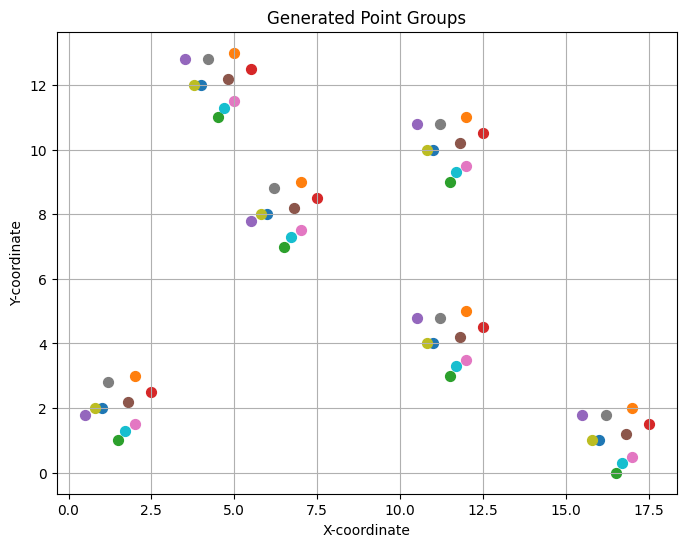

In [59]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

for point in all_points:  # Iterate over each row (point) in all_points
    plt.scatter(point[0], point[1], s=50)

plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Generated Point Groups')
plt.grid(True)  # Show grid lines
plt.show()

In [60]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(all_points)

KMeans(n_clusters=6)

In [61]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

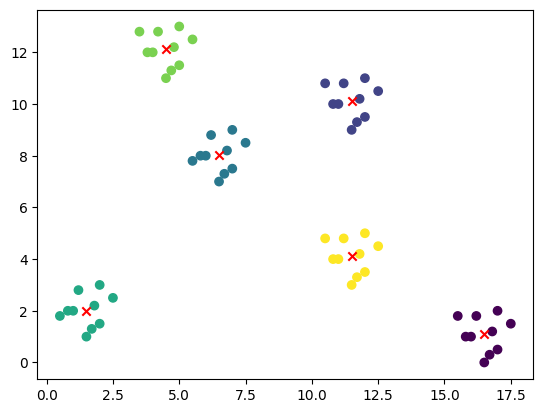

In [62]:
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.show()

In [63]:
df = pd.DataFrame(all_points, columns=['x', 'y'])
df['group'] = labels

# Elbow Method


In [64]:
# List to store the WCSS for each value of k
wcss = []

# Perform KMeans for different k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(all_points)
    wcss.append(kmeans.inertia_)  # inertia is the WCSS

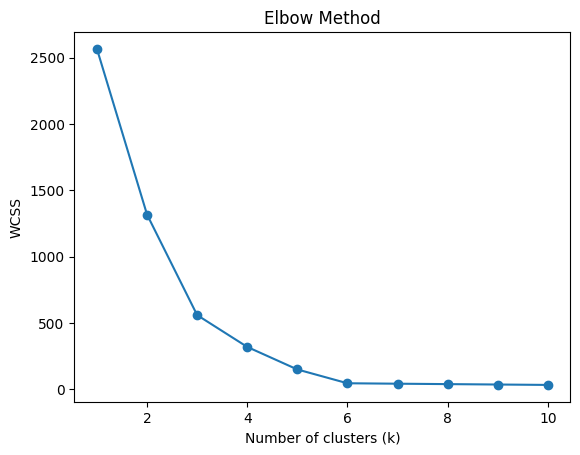

In [65]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()